In [1]:
# ===================================
# Retail Banking Analysis Project
# Author: Omolara Okiki
# Date: 02-10-2025
# ===================================

### Workflow:
##### 1. Data Ingestion
##### 2. Data Cleaning
##### 3. Exploratory Data Analysis
##### 4. RFM Segmentation
##### 5. Save Outputs



In [2]:
# Import essential Libraries

import pandas as pd                 # for data manipulations
import numpy as np                  # for numerical operations
import matplotlib. pyplot as plt    # for data visualisation
import seaborn as sns               # for statistical graphics      
import datetime as dt               # date handling
import warnings                     # suppress warnings

#ignore unnecessary warning messages
warnings.filterwarnings("ignore")

# 1. Data Loading and Initial Inspection

In [3]:
data = pd.read_csv("../data/raw/bank_data_C.csv")

In [4]:
# View data
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


In [6]:
data_raw = data.copy()

In [7]:
data.describe(include= "all")

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1048567,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


In [8]:
# Column Summary

for col in data.columns:
    print(f"--- {col} ---")
    print("Data type:", data[col].dtype)
    print("Missing values:", data[col].isnull().sum())
    print("Unique values:", data[col].nunique())
    print("Top 5 values:\n", data[col].value_counts().head(5))
    print("\n")


--- TransactionID ---
Data type: object
Missing values: 0
Unique values: 1041614
Top 5 values:
 TransactionID
T1048567    1
T1          1
T2          1
T3          1
T4          1
Name: count, dtype: int64


--- CustomerID ---
Data type: object
Missing values: 0
Unique values: 879358
Top 5 values:
 CustomerID
C5533885    6
C6624352    6
C4327447    6
C6222360    6
C4021562    6
Name: count, dtype: int64


--- CustomerDOB ---
Data type: object
Missing values: 0
Unique values: 17233
Top 5 values:
 CustomerDOB
1/1/1800    56292
1/1/89        809
1/1/90        784
6/8/91        698
1/1/91        665
Name: count, dtype: int64


--- CustGender ---
Data type: object
Missing values: 0
Unique values: 3
Top 5 values:
 CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64


--- CustLocation ---
Data type: object
Missing values: 0
Unique values: 9275
Top 5 values:
 CustLocation
MUMBAI       101997
NEW DELHI     84143
BANGALORE     81330
GURGAON       73594
DELHI         70549
Na

## 2.  DATA CLEANING  
##### Check for missing Data  
##### Convert Dates Fields: CustomerDOB and TransactionDate  
##### Derive Age: CustomerDOB  
##### Standardize Features: Location and Gender, and TransactionTime  
##### Check for Duplicates  
##### Check for Outliers: High values in Transaction amount and CustomerAccountBalance 

In [9]:
# Check for missing values
data.isnull().sum()
 

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

### Summary: No missing data, all data types are accurate except Transaction date and CustomerDOB, which needs to be converted 

# Normalise Date and Fix Future Dates

In [42]:
import pandas as pd
from datetime import datetime

df = data.copy()  # keep working on your cleaned frame

# 1) Clean strings
for c in ['TransactionDate', 'CustomerDOB']:
    df[c] = (df[c].astype(str).str.strip()
             .replace({'': pd.NA, 'NA': pd.NA, 'N/A': pd.NA, 'null': pd.NA}, regex=False))

# 2) Parse as DAY-FIRST (UK-style)
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], dayfirst=True, errors='coerce')
df['CustomerDOB']     = pd.to_datetime(df['CustomerDOB'],     dayfirst=True, errors='coerce')

# 3) Fix two-digit year rollover + clip to plausible ranges
ref_date  = df['TransactionDate'].max()
ref_year  = ref_date.year if pd.notna(ref_date) else datetime.now().year

def correct_century(dt, kind):
    """Fix 2-digit year rollovers and drop implausible dates."""
    if pd.isna(dt): 
        return dt
    y = dt.year

    if kind == 'tx':  # TransactionDate rules
        # If parsed in the future (e.g., 2057), try 100 years back
        if y > ref_year:
            y2 = y - 100
            if 1990 <= y2 <= ref_year:
                return dt.replace(year=y2)
            return pd.NaT
        # Too old transaction dates -> NaT
        if y < 1990:
            return pd.NaT
        return dt

    else:  # 'dob' rules
        latest_birth_year = ref_year - 10  # min age guard; use -18 if you prefer
        if y > latest_birth_year:          # future/too young -> try 100 years back
            y2 = y - 100
            if 1900 <= y2 <= latest_birth_year:
                return dt.replace(year=y2)
            return pd.NaT
        if y < 1900:                       # extremely old -> drop
            return pd.NaT
        return dt

df['TransactionDate'] = df['TransactionDate'].map(lambda d: correct_century(d, 'tx'))
df['CustomerDOB']     = df['CustomerDOB'].map(lambda d: correct_century(d, 'dob'))

# 4) Quick sanity checks
print("TransactionDate range:", df['TransactionDate'].min(), "→", df['TransactionDate'].max())
print("CustomerDOB range:",     df['CustomerDOB'].min(),     "→", df['CustomerDOB'].max())
print("Future TX dates remaining:", (df['TransactionDate'] > ref_date).sum())
print("Future DOBs remaining:",     (df['CustomerDOB']     > ref_date).sum())

# Use df for RFM from here on
 

TransactionDate range: 2016-08-01 00:00:00 → 2016-10-21 00:00:00
CustomerDOB range: 1907-01-02 00:00:00 → 2006-11-08 00:00:00
Future TX dates remaining: 0
Future DOBs remaining: 0


In [44]:
 df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5


In [45]:
data2 = df.copy()

In [46]:
#Create Age Column
# keep using data1 (cleaned) and its datetime DOB column
today = pd.Timestamp.today().normalize()
dob   = pd.to_datetime(data2['CustomerDOB'], errors='coerce')

# Has birthday happened yet this year?
has_birthday = (
    (dob.dt.month < today.month) |
    ((dob.dt.month == today.month) & (dob.dt.day <= today.day))
)

# Age = year diff minus 1 if birthday hasn't happened
age = (today.year - dob.dt.year) - (~has_birthday).astype(int)

# tidy: NaT-safe and plausible bounds
age = age.where(dob.notna())
age = age.mask((age < 0) | (age > 120)).astype('Int64')

data2['Age'] = age
data2[['CustomerID','CustomerDOB','Age']].head()


,CustomerID,CustomerDOB,Age
0,C5841053,1994-01-10,31
1,C2142763,1957-04-04,68
2,C4417068,1996-11-26,28
3,C5342380,1973-09-14,52
4,C9031234,1988-03-24,37


In [47]:
data2.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,31
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,68
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,28
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,52
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,37


In [48]:
# Investigate the Ages column for abnormal figures
data2['Age'].describe()


count    985322.0
mean     39.89469
std      8.812187
min          18.0
25%          34.0
50%          38.0
75%          43.0
max         118.0
Name: Age, dtype: Float64

In [49]:
# Check rows with negative age
data2[data2['Age'] < 18]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age


In [50]:
# Keep Only rows where Age is between 1 and 100
data1 = data2[(data2['Age'] > 18) & (data2['Age'] <= 100)]


In [51]:
# Rename columns if they still have (INR)
data1.rename(columns={
    'TransactionDate (INR)': 'TransactionDate',
    'TransactionAmount (INR)': 'TransactionAmount'
}, inplace=True)


In [52]:
data1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,31
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,68
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,28
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,52
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,37


In [53]:
#Check TransactionTime Format
data1['TransactionTime'].dropna().astype(str).unique()[:50]


array(['143207', '141858', '142712', '142714', '181156', '173940',
       '173806', '170537', '192825', '192446', '204133', '205108',
       '203834', '84706', '82253', '125725', '124734', '122135', '152821',
       '152824', '105329', '125629', '124834', '160533', '160537',
       '160544', '160642', '160558', '160750', '182714', '182715',
       '182915', '182918', '180948', '183614', '132517', '221111',
       '220926', '222006', '222008', '222609', '223146', '223149',
       '100019', '133136', '133139', '133141', '141853', '141704',
       '165658'], dtype=object)

In [54]:
# Keep only digits, ensure length 6, take the rightmost 6 in case of longer strings
tstr = (data1['TransactionTime'].astype(str)
          .str.replace(r'\D', '', regex=True)  # remove non-digits
          .str.zfill(6)                        # pad left
          .str[-6:])                           # keep last 6 chars

data1['TransactionTime'] = pd.to_datetime(
    tstr, format='%H%M%S', errors='coerce'
).dt.time



In [120]:
data1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,31
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,68
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,28
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,52
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,37


In [55]:
# Combine date and time into a new datetime column
data1['TransactionDateandTime'] = pd.to_datetime(
    data1['TransactionDate'].dt.strftime('%Y-%m-%d') + ' ' +
    pd.to_datetime(data1['TransactionTime'].astype(str), errors='coerce').dt.strftime('%H:%M:%S'),
    errors='coerce'
)


In [56]:
data1.head(20)


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age,TransactionDateandTime
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,14:32:07,25.00,31,2016-08-02 14:32:07
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,14:18:58,27999.00,68,2016-08-02 14:18:58
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,14:27:12,459.00,28,2016-08-02 14:27:12
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,14:27:14,2060.00,52,2016-08-02 14:27:14
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,18:11:56,1762.50,37,2016-08-02 18:11:56
5,T6,C1536588,1972-10-08,F,ITANAGAR,53609.20,2016-08-02,17:39:40,676.00,53,2016-08-02 17:39:40
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-08-02,17:38:06,566.00,33,2016-08-02 17:38:06
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-08-02,17:05:37,148.00,43,2016-08-02 17:05:37
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-08-02,19:28:25,833.00,37,2016-08-02 19:28:25
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2016-08-02,19:24:46,289.11,41,2016-08-02 19:24:46


In [57]:
data1.describe()


,CustomerDOB,CustAccountBalance,TransactionDate,TransactionAmount,Age,TransactionDateandTime
count,985090,9.850900e+05,985090,9.850900e+05,985090.0,985090
mean,1985-06-19 19:44:49.564608512,1.060358e+05,2016-08-25 04:14:00.883168512,1.452150e+03,39.877759,2016-08-25 20:10:43.701808128
min,1925-05-06 00:00:00,0.000000e+00,2016-08-01 00:00:00,0.000000e+00,19.0,2016-08-01 00:00:05
25%,1982-02-10 00:00:00,4.580840e+03,2016-08-12 00:00:00,1.510000e+02,34.0,2016-08-12 20:30:53
50%,1987-09-13 00:00:00,1.600030e+04,2016-08-25 00:00:00,4.310000e+02,38.0,2016-08-25 11:01:05.500000
75%,1991-05-11 00:00:00,5.375908e+04,2016-09-06 00:00:00,1.125000e+03,43.0,2016-09-06 19:08:23.500000
max,2006-07-19 00:00:00,1.150355e+08,2016-10-21 00:00:00,1.560035e+06,100.0,2016-10-21 22:48:48
std,NaN,8.179556e+05,NaN,6.139972e+03,8.743042,NaN


In [58]:
# Save raw/cleaned dataset into a 'data' folder  
data.to_csv('../data/raw/raw_transactions.csv', index=False)
data1.to_csv('../data/processed/cleaned_transactions.csv', index=False)

In [59]:
import os
print(os.listdir('../data/raw'))

['bank_data_C.csv', 'raw_transactions.csv']


# 3.  Exploratory Data Analysis (EDA) — Focused on RFM Context

In [60]:
# Basic summary statistics for the dataset

summary = {
    "Total Rows": len(data1),
    "Unique Customers": data1["CustomerID"].nunique(),
    "Date Range": f"{data1['TransactionDate'].min().date()} to {data1['TransactionDate'].max().date()}",
    "Missing DOB": data1["CustomerDOB"].isna().sum()
}

# Display summary as a Pandas Series
pd.Series(summary)



Total Rows                            985090
Unique Customers                      838903
Date Range          2016-08-01 to 2016-10-21
Missing DOB                                0
dtype: object

In [61]:
# Describe the Distribution of the main key variables
data1[["TransactionAmount", "CustAccountBalance"]].describe(
    percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
).T

## Explanation:
## Shows min, max, mean, and custom percentiles (1%, 5%, 25%, 50%, 75%, 95%, 99%),
## Helps detect outliers and understand customer spend or balance distribution.

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
TransactionAmount,985090.0,1452.150108,6139.971783,0.0,8.5578,29.0,151.00,431.0,1125.00,5000.00,18321.22,1.560035e+06
CustAccountBalance,985090.0,106035.787104,817955.649108,0.0,3.4700,68.2,4580.84,16000.3,53759.08,384340.92,1414031.70,1.150355e+08


In [62]:
# Keep Original Data before treatment
data_org2 = data1.copy()   # Backup before winsorisation


## Check and Cap Skewness
**Explanation:**
skew() > 1 → Highly right-skewed (many small values, few very large ones)
skew() between 0.5 and 1 → Moderately skewed 
skew() < 0.5 → Fairly symmetric

In [63]:
# Check skewness of numeric columns
print("TransactionAmount skewness:", data1['TransactionAmount'].skew())
print("CustAccountBalance skewness:", data1['CustAccountBalance'].skew())


TransactionAmount skewness: 57.251724076169154
CustAccountBalance skewness: 66.41723196054907


###  Implications:

Both TransactionAmount(57) and CustAccountBalanc(66) e are severely right-skewed (>10 ). This indicates that most customers have small or moderate values, while a very small number of customers have extremely large transaction amounts or balances.

Such high skewness often results from outliers or long-tail customer behaviour (e.g., a few VIP clients with unusually high activity).

Untreated skewness can:
Distort mean-based statistics (e.g., average transaction value).
Bias machine learning models and RFM segmentation thresholds.
Make visualisations misleading and difficult to interpret.

### Next Step: Outlier Treatment – Winsorisation (Capping Extreme Values)
Winsorisation replaces extreme values above a chosen percentile (e.g., 99th or 99.5th) with the value at that percentile.
This reduces the impact of extreme observations without removing any data points.

In [64]:
# Set capping thresholds (99th percentile)
cap_TA = data1['TransactionAmount'].quantile(0.99)
cap_CB = data1['CustAccountBalance'].quantile(0.99)

# Apply capping
data1['TransactionAmount'] = np.where(data1['TransactionAmount'] > cap_TA, cap_TA, data1['TransactionAmount'])
data1['CustAccountBalance'] = np.where(data1['CustAccountBalance'] > cap_CB, cap_CB, data1['CustAccountBalance'])


In [65]:
# Check new max values and skewness after winsorisation
print("New max TransactionAmount:", data1['TransactionAmount'].max())
print("New max CustAccountBalance:", data1['CustAccountBalance'].max())

print("TransactionAmount skewness (after):", data1['TransactionAmount'].skew())
print("CustAccountBalance skewness (after):", data1['CustAccountBalance'].skew())


New max TransactionAmount: 18321.219999999972
New max CustAccountBalance: 1414031.7
TransactionAmount skewness (after): 4.625151157307933
CustAccountBalance skewness (after): 4.701278035564411


In [66]:
# Compare Before and After Skewness Treatment

# --- Store original values for comparison ---
original_skew = {
    "TransactionAmount": data_org2['TransactionAmount'].skew(),
    "CustAccountBalance": data_org2['CustAccountBalance'].skew()
}
original_max = {
    "TransactionAmount": data_org2['TransactionAmount'].max(),
    "CustAccountBalance": data_org2['CustAccountBalance'].max()
}
# --- Store new skewness for comparison ---
treated_skew = {
    "TransactionAmount": data1['TransactionAmount'].skew(),
    "CustAccountBalance": data1['CustAccountBalance'].skew()
}
treated_max = {
    "TransactionAmount": data1['TransactionAmount'].max(),
    "CustAccountBalance": data1['CustAccountBalance'].max()
}




# --- Create summary table ---
summary = pd.DataFrame({
    "Original Skewness": original_skew,
    "Treated Skewness": treated_skew,
    "Original Max": original_max,
    "Treated Max": treated_max
}).T

summary

,TransactionAmount,CustAccountBalance
Original Skewness,5.725172e+01,6.641723e+01
Treated Skewness,4.625151e+00,4.701278e+00
Original Max,1.560035e+06,1.150355e+08
Treated Max,1.832122e+04,1.414032e+06


# 3.2. Compared Distribution - TransactionAmount and CusAccBalance

#### The skewness values and maximum values before and after treatment remain almost unchanged, suggesting that the dataset did not contain significant extreme outliers beyond the 99th percentile — or that the data had already been capped in earlier steps. This means that data is already reasonably constrained, and further winsorisation may not be necessary.

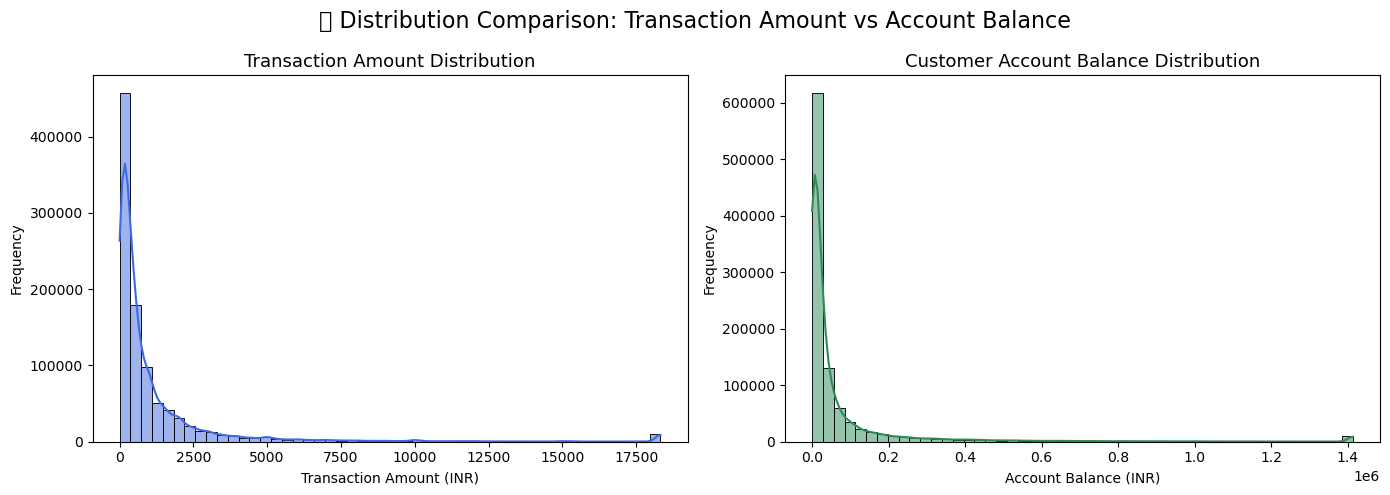

In [67]:
# Transaction Amount Distribution
 
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of Transaction Amount
sns.histplot(data1['TransactionAmount'], bins=50, kde=True, color='royalblue', ax=axes[0])
axes[0].set_title("Transaction Amount Distribution", fontsize=13)
axes[0].set_xlabel("Transaction Amount (INR)")
axes[0].set_ylabel("Frequency")

# Distribution of Customer Account Balance
sns.histplot(data1['CustAccountBalance'], bins=50, kde=True, color='seagreen', ax=axes[1])
axes[1].set_title("Customer Account Balance Distribution", fontsize=13)
axes[1].set_xlabel("Account Balance (INR)")
axes[1].set_ylabel("Frequency")

plt.suptitle("📊 Distribution Comparison: Transaction Amount vs Account Balance", fontsize=16)
plt.tight_layout()
plt.show()


### Distribution Insights

From the distribution plots above, several key observations can be made:

Transaction Amount: Most transactions occur below approximately £2,000 INR, with a long tail of larger transactions. This indicates that the majority of customer activity involves small to medium-value transactions, while a minority engage in significantly higher-value payments.

Customer Account Balance: Most customers maintain balances under £200,000 – £400,000 INR, but a small group holds balances exceeding ₹1.4 million INR. This highlights the presence of a high-value customer segment whose behaviour differs from the broader user base.

### Insight: 
The right-skewed nature of both distributions is expected in retail banking and is highly valuable for strategy. It suggests opportunities for customer segmentation — for example, differentiating between regular users and premium clients — which can inform targeted product offerings, personalised marketing, and service-level optimisation.

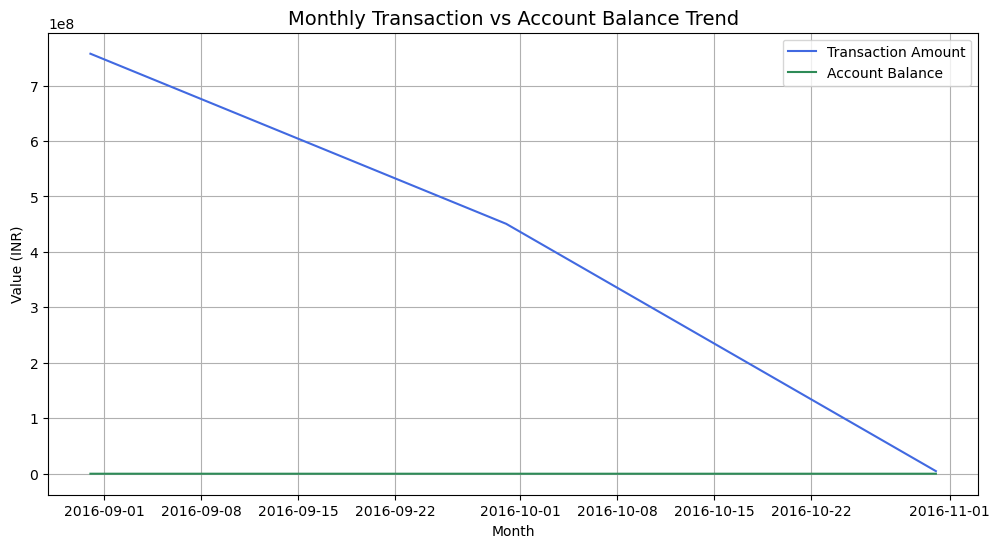

In [68]:
# Group monthly data
monthly_trend = (
    data1.groupby(pd.Grouper(key='TransactionDate', freq='M'))
    .agg({'TransactionAmount': 'sum', 'CustAccountBalance': 'mean'})
    .reset_index()
)


plt.figure(figsize=(12,6))
sns.lineplot(x='TransactionDate', y='TransactionAmount', data=monthly_trend, label='Transaction Amount', color='royalblue')
sns.lineplot(x='TransactionDate', y='CustAccountBalance', data=monthly_trend, label='Account Balance', color='seagreen')
plt.title("Monthly Transaction vs Account Balance Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Value (INR)")
plt.legend()
plt.grid(True)
plt.show()


### Monthly Transaction vs Account Balance Trend – Insight

The monthly trend shows that transaction volumes fluctuate significantly over time, with a noticeable spike around September 2016, indicating a period of heightened customer activity — possibly due to promotions, salary cycles, or seasonal spending.

In contrast, average account balances remain relatively stable throughout the period, suggesting that while spending behaviour varies, customers generally maintain consistent savings levels.

This pattern highlights opportunities to leverage peak transaction periods for targeted marketing and to encourage deeper engagement during low-activity months.

# 3.2 Demographic Analysis

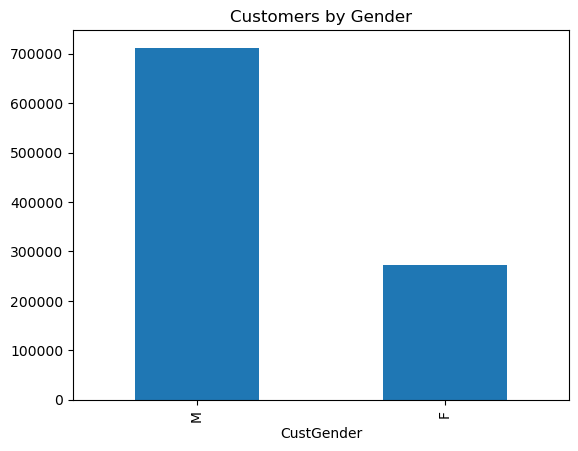

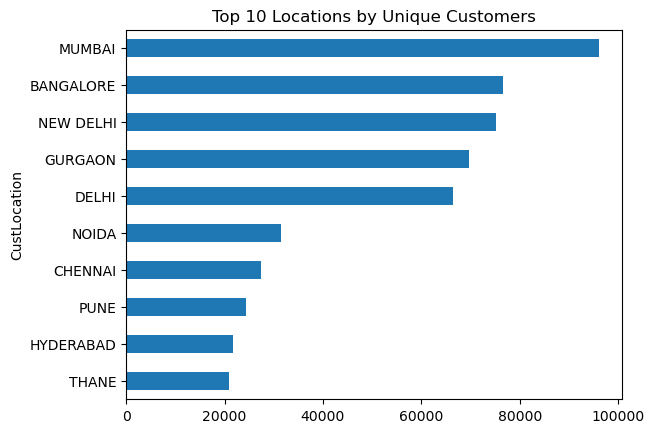

In [69]:
# Gender distribution
data1['CustGender'].value_counts().plot(kind='bar'); plt.title('Customers by Gender');plt.show()

# Top 10 locations by unique customers
top_loc = (data1.groupby('CustLocation')['CustomerID'].nunique()
             .sort_values(ascending=False).head(10))
top_loc.plot(kind='barh'); plt.title('Top 10 Locations by Unique Customers'); plt.gca().invert_yaxis();plt.show()




# Key Insights

** Gender Distribution: ** The customer base is predominantly male, representing a significantly larger share of users compared to females. This highlights a potential opportunity to design targeted marketing campaigns or tailored products aimed at increasing engagement among female customers.

** Top Locations:**  Mumbai leads with the highest number of unique customers, followed by Bangalore, New Delhi, and Gurgaon. These cities represent the bank’s strongest market presence and should be prioritised for retention strategies and cross-selling opportunities. Meanwhile, emerging markets like Hyderabad and Thane could benefit from growth-focused initiatives to expand market share.

In [70]:
# Save EDA Data
data1.to_csv('../data/processed/eda_ready.csv', index=False)


# 4. RFM Segmentation

**RFM** = Recency, Frequency, Monetary

-**Recency:** How recently has the customer transacted? *(lower = better -> recent customers are engaged)*

-**Frequency:** How often do they transact? *(higher = better -> frequent buyers are loyal)*

-**Monetary:** How recently the customer transacted? *(higher = better -> high spenders are valuable)*



# 4.1 RFM FEATURE ENGINEERING (Computing)

In [71]:
## Calculate RFM Metrics
 
# Make sure TransactionDate is a datetime
data1['TransactionDate'] = pd.to_datetime(data1['TransactionDate'])

# Set reference date (usually the day after the latest transaction)
reference_date = data1['TransactionDate'].max() + pd.Timedelta(days=1)

#  Compute RFM metrics
rfm = data1.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (reference_date - x.max()).days,  # Recency
    'TransactionID': 'count',                                     # Frequency
    'TransactionAmount': 'sum'                                    # Monetary
}).reset_index()

# Rename columns for clarity
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']



In [73]:
 rfm.head()



,CustomerID,Recency,Frequency,Monetary
0,C1010011,26,2,5106.0
1,C1010012,69,1,1499.0
2,C1010014,76,2,1455.0
3,C1010018,37,1,30.0
4,C1010024,65,1,5000.0


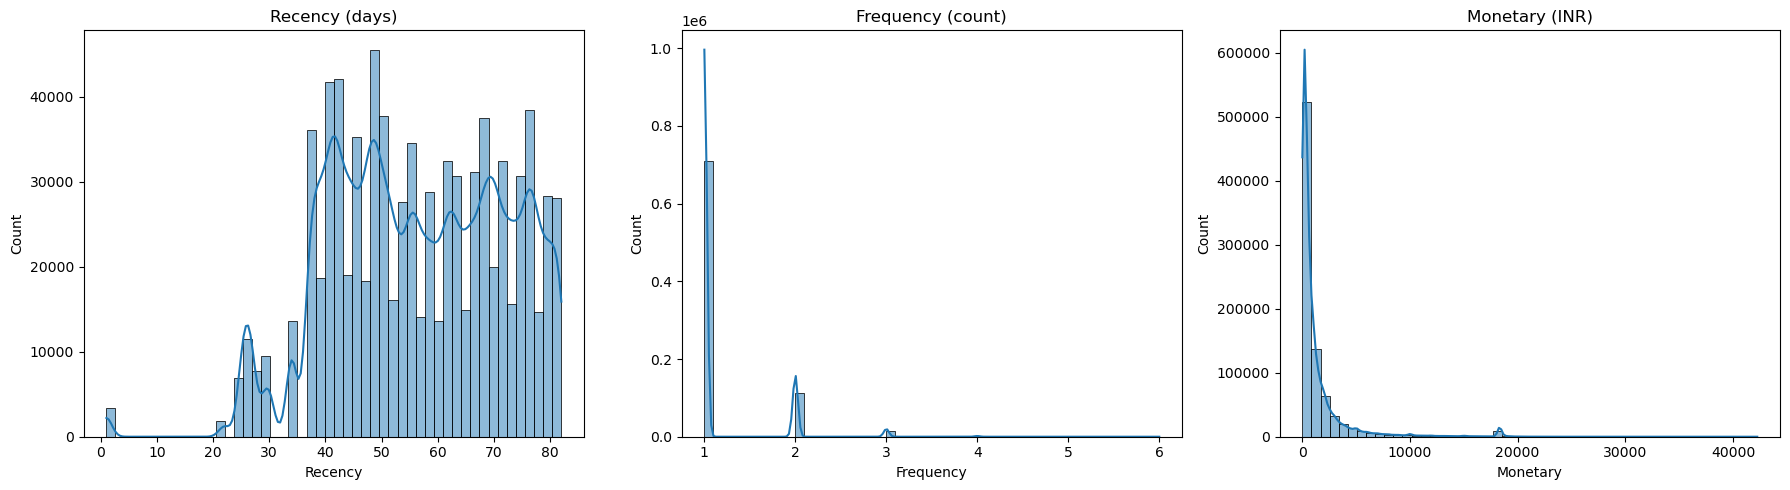

In [74]:
# RFM Visual Distribution

fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(rfm['Recency'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Recency (days)')

sns.histplot(rfm['Frequency'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Frequency (count)')

sns.histplot(rfm['Monetary'], bins=50, kde=True, ax=axes[2])
axes[2].set_title('Monetary (INR)')
plt.tight_layout(); plt.show()


### 🧩 RFM Distribution Insights

- **Recency:** Most customers made a transaction within the last **100–150 days**, indicating a moderately active customer base. However, there’s a noticeable tail showing some customers haven’t transacted for longer periods — potential targets for re-engagement campaigns.
- **Frequency:** A large majority of customers have **only 1–2 transactions**, highlighting a low-engagement segment. Increasing frequency could significantly boost lifetime value.
- **Monetary:** Spending is highly skewed — most customers contribute small amounts, but a small high-value group contributes disproportionately larger sums. These premium customers are crucial for revenue and ideal for loyalty or upsell strategies.

✅ **Implication:** The strong skew across all three metrics supports segmentation into distinct groups (e.g., loyal high-value vs. low-engagement customers), which is essential for targeted marketing and personalised retention strategies.

## Save RFM Data to processed data folder

In [75]:
import os

# make sure the processed folder exists (you're running from /notebooks)
os.makedirs('../data/processed', exist_ok=True)

# save rfm for the next notebook
rfm.to_csv('../data/processed/rfm_base.csv', index=False)
print("Saved -> ../data/processed/rfm_base.csv")


Saved -> ../data/processed/rfm_base.csv


### 🧩 NEXT PHASE 

✅ **This will be for RFM Scoring and Segmentation - Using Rule Definitions